In [1]:
# imports 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#  Supress Warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.mode.chained_assignment = None  # supress wanrings
pd.set_option('display.max_columns', 500)

cars_df = pd.read_csv('CarPrice_Assignment.csv', engine="python")
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60000,168.80000,64.10000,48.80000,2548,dohc,four,130,mpfi,3.47000,2.68000,9.00000,111,5000,21,27,13495.00000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60000,168.80000,64.10000,48.80000,2548,dohc,four,130,mpfi,3.47000,2.68000,9.00000,111,5000,21,27,16500.00000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50000,171.20000,65.50000,52.40000,2823,ohcv,six,152,mpfi,2.68000,3.47000,9.00000,154,5000,19,26,16500.00000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80000,176.60000,66.20000,54.30000,2337,ohc,four,109,mpfi,3.19000,3.40000,10.00000,102,5500,24,30,13950.00000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40000,176.60000,66.40000,54.30000,2824,ohc,five,136,mpfi,3.19000,3.40000,8.00000,115,5500,18,22,17450.00000


In [2]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [3]:
cars_df.drop('car_ID', axis=1,inplace=True)

In [4]:
cars_df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000
mean,0.83415,98.75659,174.04927,65.90780,53.72488,2555.56585,126.90732,3.32976,3.25541,10.14254,104.11707,5125.12195,25.21951,30.75122,13276.71057
std,1.24531,6.02178,12.33729,2.14520,2.44352,520.68020,41.64269,0.27084,0.31360,3.97204,39.54417,476.98564,6.54214,6.88644,7988.85233
min,-2.00000,86.60000,141.10000,60.30000,47.80000,1488.00000,61.00000,2.54000,2.07000,7.00000,48.00000,4150.00000,13.00000,16.00000,5118.00000
25%,0.00000,94.50000,166.30000,64.10000,52.00000,2145.00000,97.00000,3.15000,3.11000,8.60000,70.00000,4800.00000,19.00000,25.00000,7788.00000
50%,1.00000,97.00000,173.20000,65.50000,54.10000,2414.00000,120.00000,3.31000,3.29000,9.00000,95.00000,5200.00000,24.00000,30.00000,10295.00000
75%,2.00000,102.40000,183.10000,66.90000,55.50000,2935.00000,141.00000,3.58000,3.41000,9.40000,116.00000,5500.00000,30.00000,34.00000,16503.00000
max,3.00000,120.90000,208.10000,72.30000,59.80000,4066.00000,326.00000,3.94000,4.17000,23.00000,288.00000,6600.00000,49.00000,54.00000,45400.00000


In [5]:
# original shape
print("Original Shape :" + cars_df.shape.__str__())


Original Shape :(205, 25)


In [6]:
# removing all null columns
null_columns = cars_df.isnull().mean() == 1
cars_df_cleaned = cars_df.loc[:,null_columns.values != True]

# removing column where all values are same
unique_column = cars_df_cleaned.nunique() == 1 
cars_df_cleaned = cars_df_cleaned.loc[: , unique_column.values != True]

# removing  duplicate rows
cars_df_cleaned = cars_df_cleaned.drop_duplicates()
# no such row was detected
# all rows are unique
print("Updated Shape :" + cars_df_cleaned.shape.__str__())
#Good that our data frame does not needs cleaning as we have already less number of data sets

Updated Shape :(205, 25)


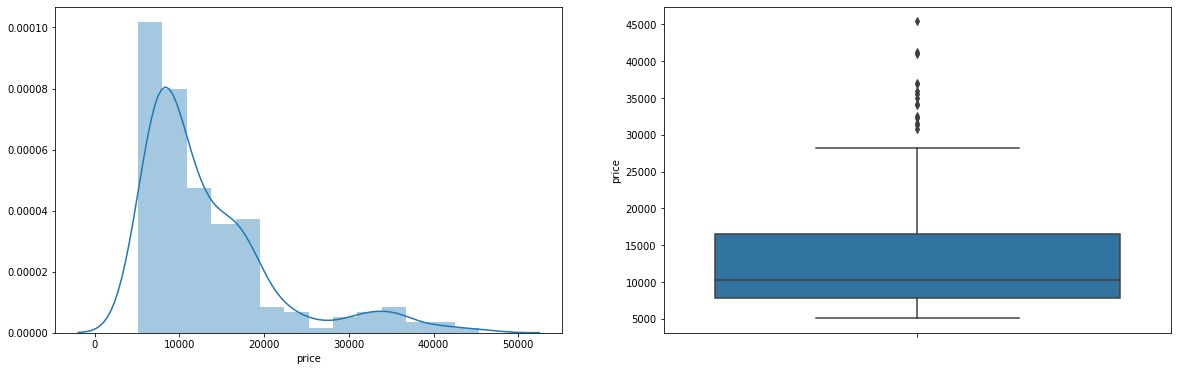

In [7]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.distplot(cars_df.price)

plt.subplot(1,2,2)
sns.boxplot(y=cars_df.price)

plt.show()

#### Majority of car prices falls in between 5k to 20k range 

In [8]:
cars_df['carCompany']=cars_df['CarName'].str.split(' ').str[0]
print(cars_df['carCompany'].isnull().values.any())
print(cars_df['carCompany'].unique())

#Correcting some spelling mistakes
cars_df.loc[(cars_df.carCompany == 'maxda') |(cars_df.carCompany == 'mazda'),'carCompany'] = 'mazda'
cars_df.loc[(cars_df.carCompany == 'Nissan') |(cars_df.carCompany == 'nissan'),'carCompany'] = 'nissan'
cars_df.loc[(cars_df.carCompany == 'toyota') |(cars_df.carCompany == 'toyouta'),'carCompany'] = 'toyota'
cars_df.loc[(cars_df.carCompany == 'porsche') |(cars_df.carCompany == 'porcshce'),'carCompany'] = 'porsche'
cars_df.loc[(cars_df.carCompany == 'vokswagen') |(cars_df.carCompany == 'volkswagen') |(cars_df.carCompany == 'vw'),'carCompany'] = 'volkswagen'

print(cars_df['carCompany'].unique())

False
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


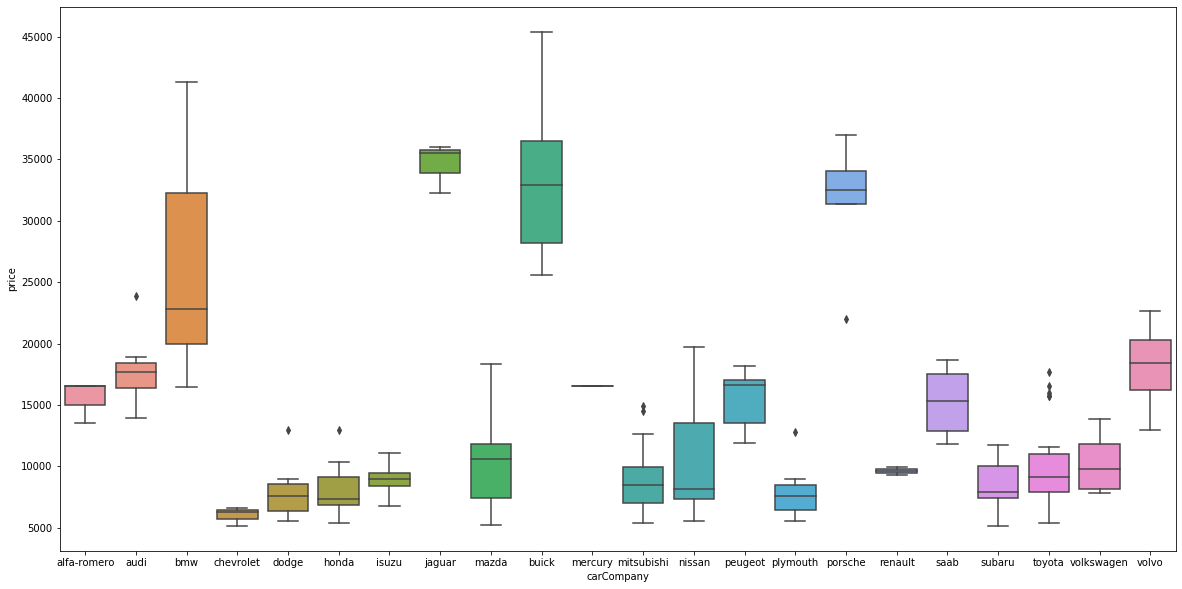

In [9]:
plt.figure(figsize=(20,10))
#Checking brand value vs price effect 
sns.boxplot(x="carCompany",y="price",data=cars_df)

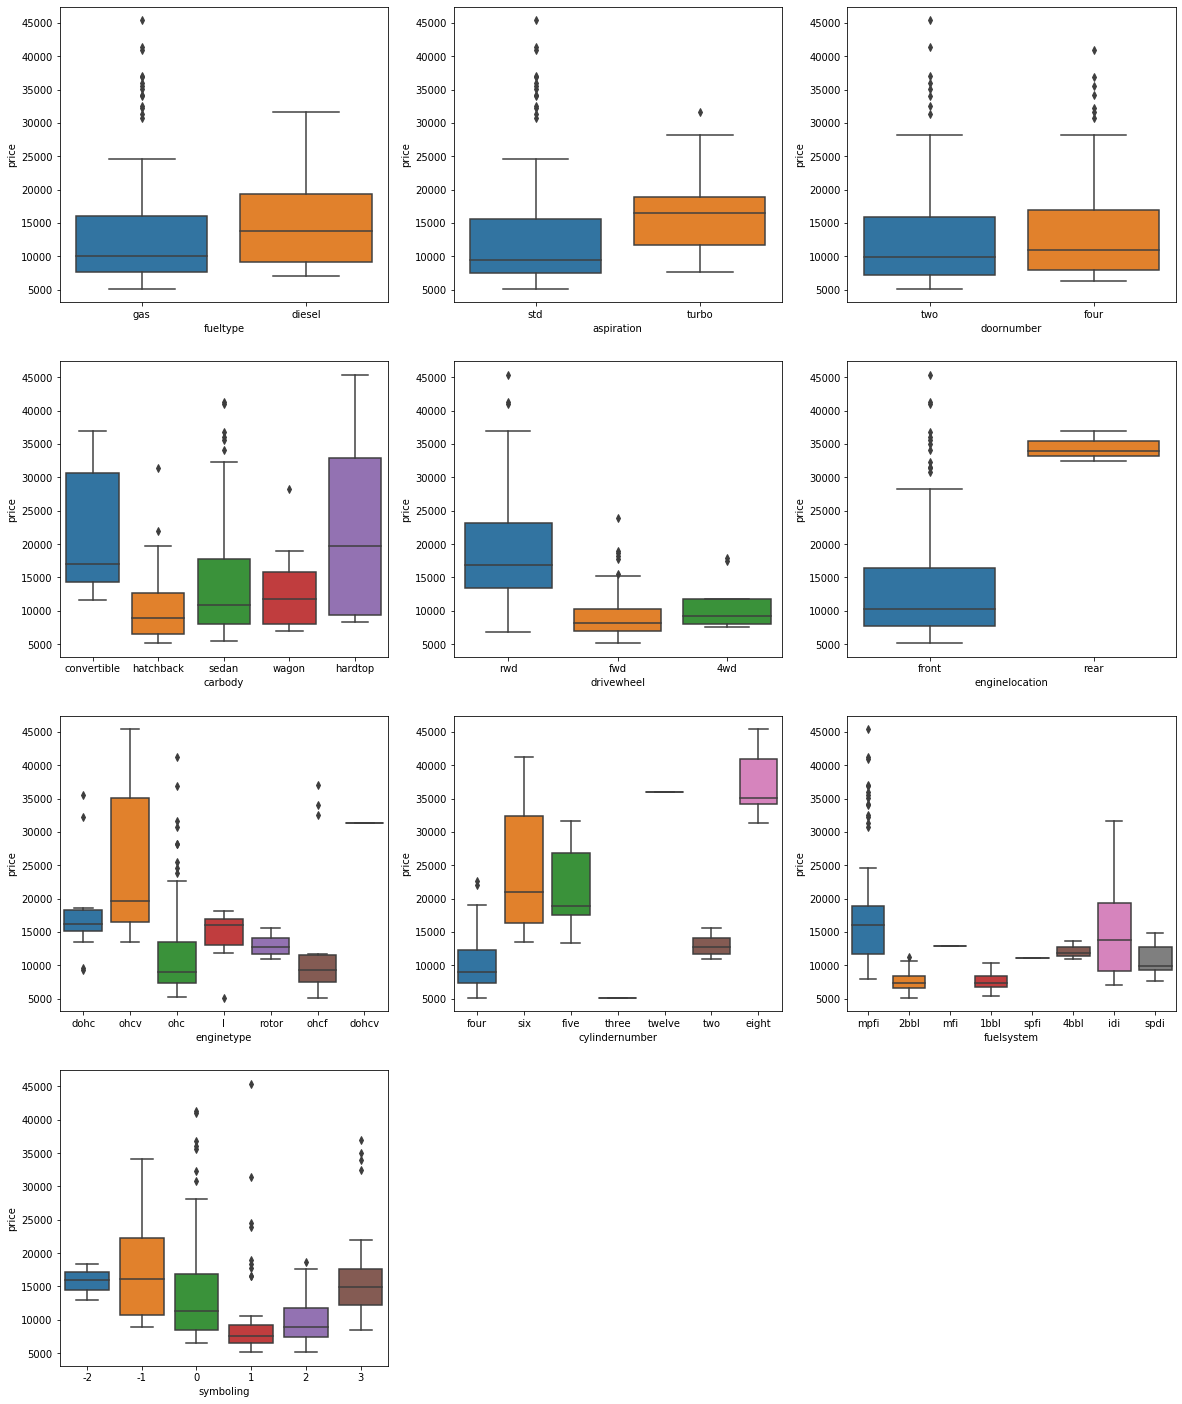

In [10]:
# Plotting other categorical varaibles
plt.figure(figsize=(20,25))
plt.subplot(4,3,1)
sns.boxplot(x="fueltype",y="price",data=cars_df)
plt.subplot(4,3,2)
sns.boxplot(x="aspiration",y="price",data=cars_df)
plt.subplot(4,3,3)
sns.boxplot(x="doornumber",y="price",data=cars_df)
plt.subplot(4,3,4)
sns.boxplot(x="carbody",y="price",data=cars_df)
plt.subplot(4,3,5)
sns.boxplot(x="drivewheel",y="price",data=cars_df)
plt.subplot(4,3,6)
sns.boxplot(x="enginelocation",y="price",data=cars_df)
plt.subplot(4,3,7)
sns.boxplot(x="enginetype",y="price",data=cars_df)
plt.subplot(4,3,8)
sns.boxplot(x="cylindernumber",y="price",data=cars_df)
plt.subplot(4,3,9)
sns.boxplot(x="fuelsystem",y="price",data=cars_df)
plt.subplot(4,3,10)
sns.boxplot(x="symboling",y="price",data=cars_df)
plt.show()

### Observation
- Diesel car seems to be a bit expensive than gas cars
- Reverse drive wheel cars seem expensive than other drive wheel cars
- Rear engine location cars are significantly expensive than cars with engines at the front
	(A business logic is that most luxury sports cars have engines at back)
- ohcv engine has widespread in case of prices
- Price also varies according to cylinder number.


In [11]:
# taking average of mileage for sake of simplicty 
cars_df['mileage']=(cars_df['citympg']+cars_df['highwaympg'])/2

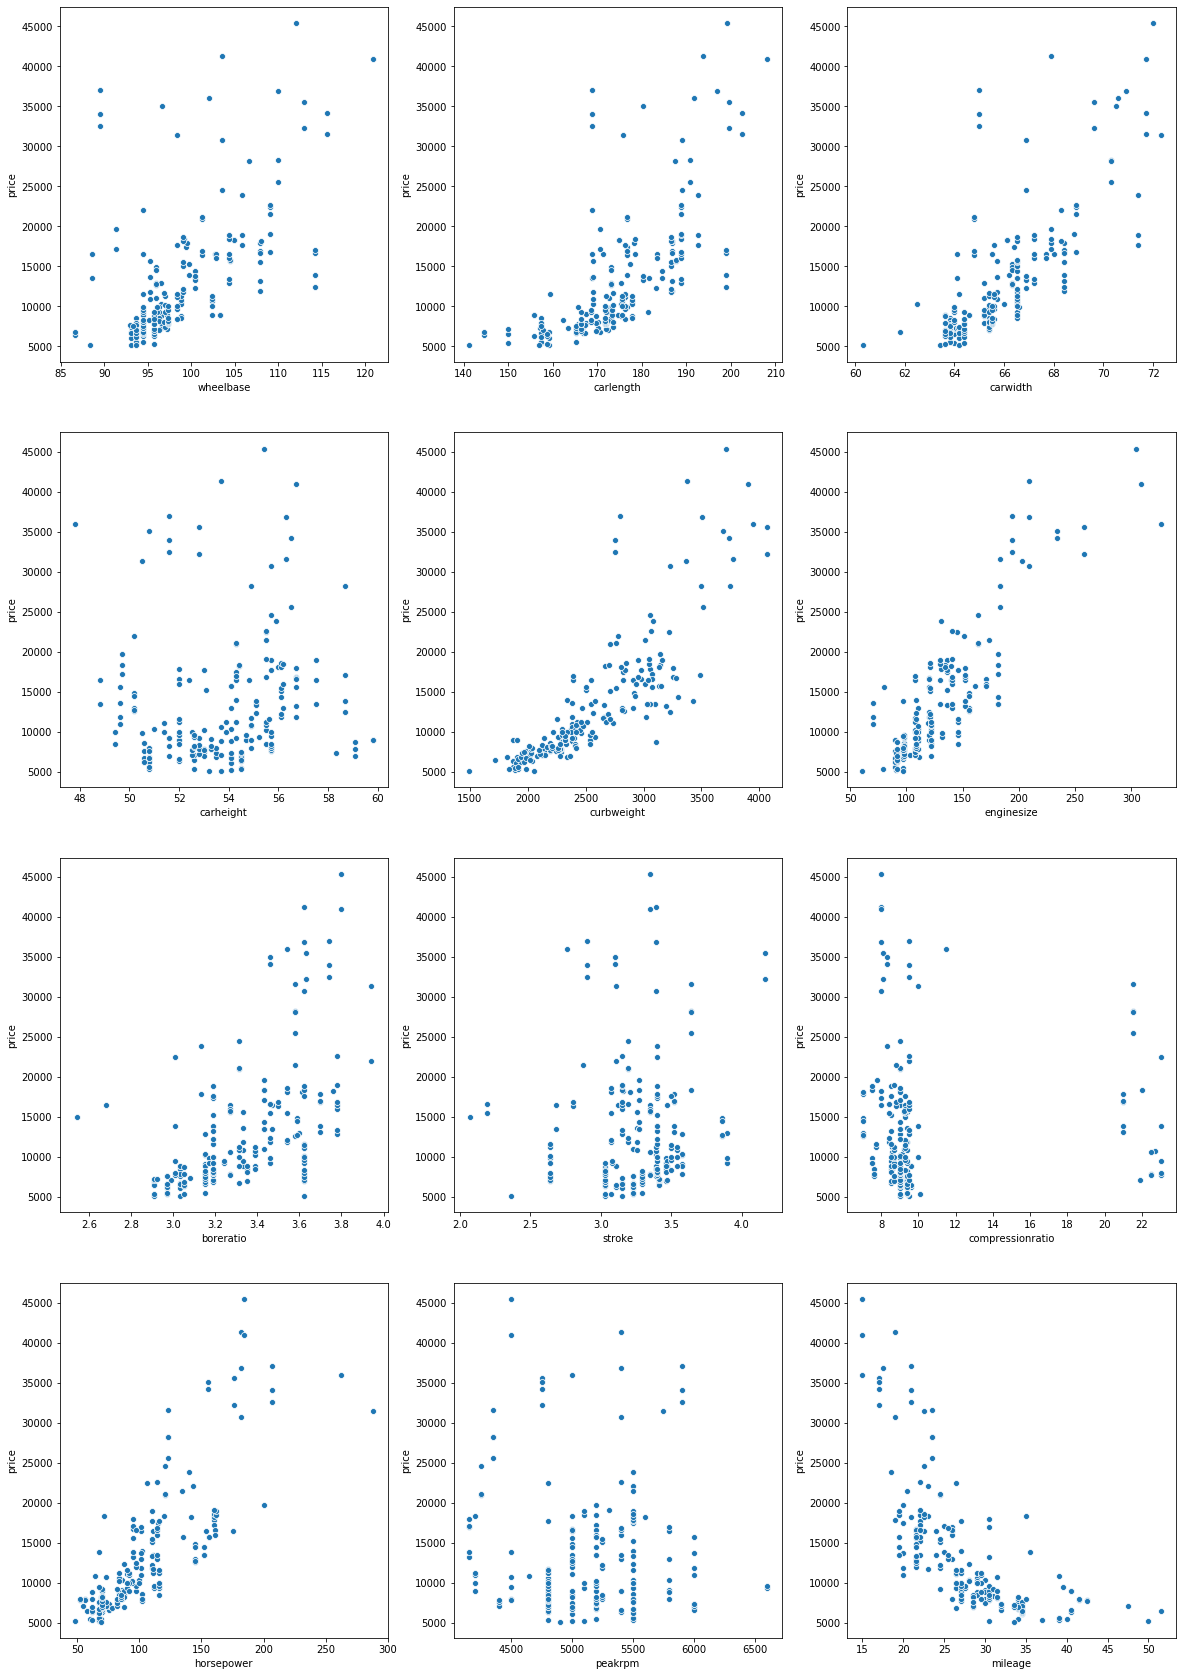

In [12]:
#studying numerical varaible patterns
plt.figure(figsize=(20,30))
plt.subplot(4,3,1)
sns.scatterplot(x = 'wheelbase', y = 'price', data = cars_df)
plt.subplot(4,3,2)
sns.scatterplot(x = 'carlength', y = 'price', data = cars_df)
plt.subplot(4,3,3)
sns.scatterplot(x = 'carwidth', y = 'price', data = cars_df)
plt.subplot(4,3,4)
sns.scatterplot(x = 'carheight', y = 'price', data = cars_df)
plt.subplot(4,3,5)
sns.scatterplot(x = 'curbweight', y = 'price', data = cars_df)
plt.subplot(4,3,6)
sns.scatterplot(x = 'enginesize', y = 'price', data = cars_df)
plt.subplot(4,3,7)
sns.scatterplot(x = 'boreratio', y = 'price', data = cars_df)
plt.subplot(4,3,8)
sns.scatterplot(x = 'stroke', y = 'price', data = cars_df)
plt.subplot(4,3,9)
sns.scatterplot(x = 'compressionratio', y = 'price', data = cars_df)
plt.subplot(4,3,10)
sns.scatterplot(x = 'horsepower', y = 'price', data = cars_df)
plt.subplot(4,3,11)
sns.scatterplot(x = 'peakrpm', y = 'price', data = cars_df)
plt.subplot(4,3,12)
sns.scatterplot(x = 'mileage', y = 'price', data = cars_df)
plt.show()


### There seems be linear relation between below varaibles and price
- wheelbase
- carlength
- carwidth
- curbweight (strong relation)
- enginesize (strong relation)
- boreratio
- horsepower(strong relation)
- citympg (negative relation)
- highwaympg (negative relation)

### In manyplot some values are having alomst less distribution wrt price. like dohcv engine type, 3 cylinder number etc. Lets keep it in our modal instead of ommiting it 

In [13]:
#creating a derived variable called car_category 
cars_df['price'] = cars_df['price'].astype('int')
average_price = pd.DataFrame(cars_df.groupby(['carCompany'])['price'].mean().reset_index())
print(average_price.min(),average_price.max())
bins = [0,10000,20000,40000]
average_price['car_category'] = pd.cut(average_price['price'],bins,right=False,labels=['Budget','entryLuxury','HighEndLuxury'])
average_price.drop('price', axis=1,inplace=True)
average_price
cars_df = cars_df.merge(average_price.reset_index(), how='left',on='carCompany')
cars_df.head()

carCompany    alfa-romero
price          6007.00000
dtype: object carCompany         volvo
price        34600.00000
dtype: object


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany,mileage,index,car_category
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60000,168.80000,64.10000,48.80000,2548,dohc,four,130,mpfi,3.47000,2.68000,9.00000,111,5000,21,27,13495,alfa-romero,24.00000,0,entryLuxury
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60000,168.80000,64.10000,48.80000,2548,dohc,four,130,mpfi,3.47000,2.68000,9.00000,111,5000,21,27,16500,alfa-romero,24.00000,0,entryLuxury
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50000,171.20000,65.50000,52.40000,2823,ohcv,six,152,mpfi,2.68000,3.47000,9.00000,154,5000,19,26,16500,alfa-romero,22.50000,0,entryLuxury
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80000,176.60000,66.20000,54.30000,2337,ohc,four,109,mpfi,3.19000,3.40000,10.00000,102,5500,24,30,13950,audi,27.00000,1,entryLuxury
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40000,176.60000,66.40000,54.30000,2824,ohc,five,136,mpfi,3.19000,3.40000,8.00000,115,5500,18,22,17450,audi,20.00000,1,entryLuxury


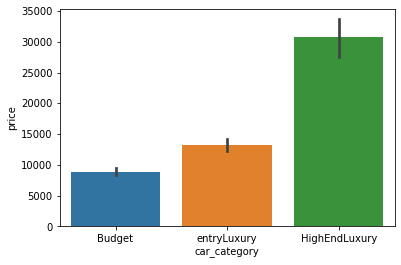

In [14]:
 sns.barplot(x="car_category", y="price",data=cars_df)

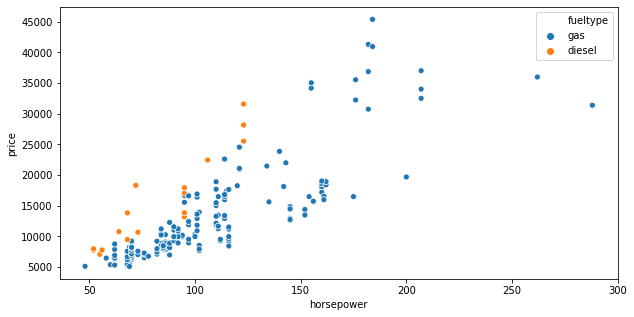

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'horsepower', y = 'price', hue = 'fueltype', data = cars_df)
plt.show()

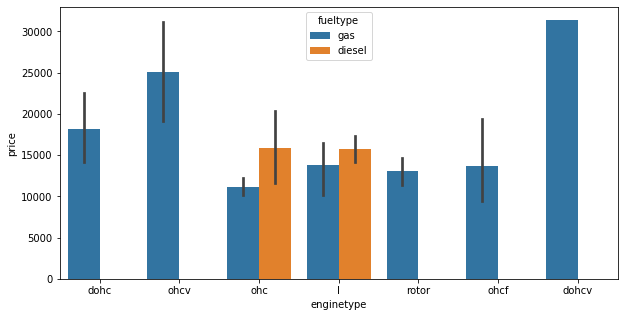

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'enginetype', y = 'price', hue = 'fueltype', data = cars_df)
plt.show()

#### Diseal engine is only present in ohc and I type models. This is a good domain learning

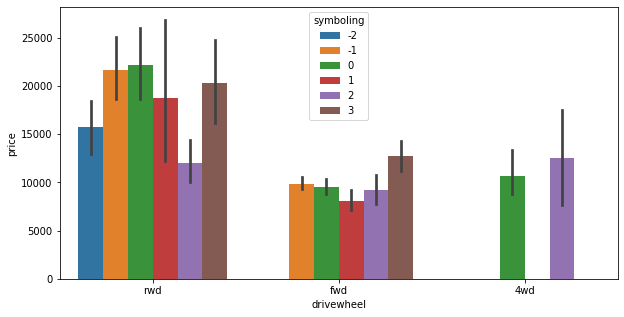

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'drivewheel', y = 'price', hue = 'symboling', data = cars_df)
plt.show()

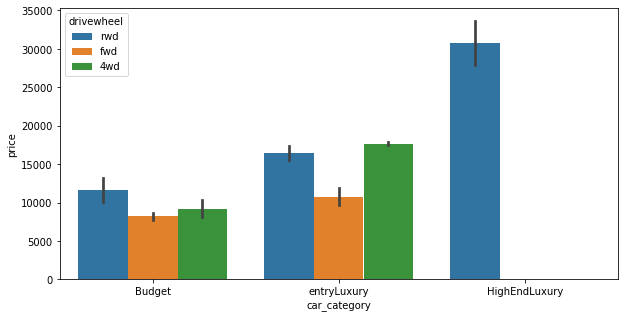

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'car_category', y = 'price', hue = 'drivewheel', data = cars_df)
plt.show()

#### All Highend luxry cur uses rwd drive type


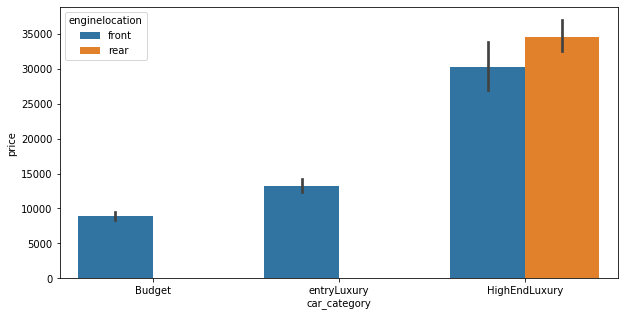

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'car_category', y = 'price', hue = 'enginelocation', data = cars_df)
plt.show()

#### Rear engine is only present in highend luxury cars (20k and above price tag)

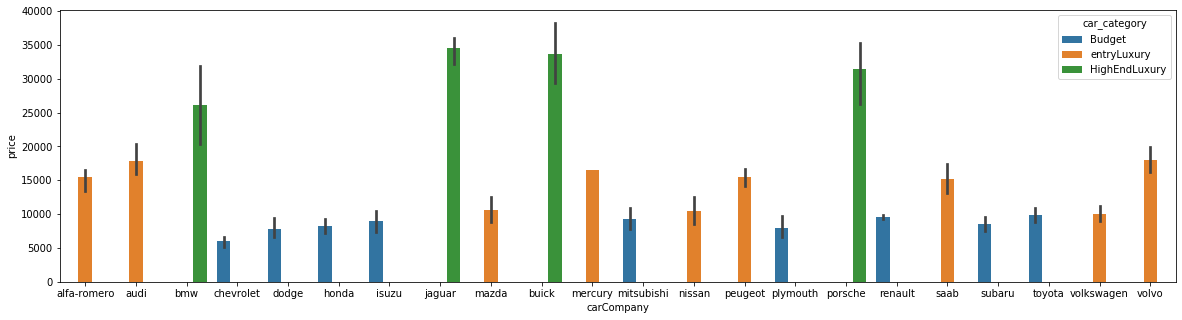

In [20]:
plt.figure(figsize=(20,5))
sns.barplot(x = 'carCompany', y = 'price', hue = 'car_category', data = cars_df)
plt.show()

# this shows that we can use only our new variable car_category for our model instead of carCompany

In [21]:
# advanced cateogry to numerical like label encoding and dummy column creation. 
#For sake of simplicty lets create copy of our df and work on it 

cars_df_ML=cars_df.copy()
cars_df_ML

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany,mileage,index,car_category
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60000,168.80000,64.10000,48.80000,2548,dohc,four,130,mpfi,3.47000,2.68000,9.00000,111,5000,21,27,13495,alfa-romero,24.00000,0,entryLuxury
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60000,168.80000,64.10000,48.80000,2548,dohc,four,130,mpfi,3.47000,2.68000,9.00000,111,5000,21,27,16500,alfa-romero,24.00000,0,entryLuxury
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50000,171.20000,65.50000,52.40000,2823,ohcv,six,152,mpfi,2.68000,3.47000,9.00000,154,5000,19,26,16500,alfa-romero,22.50000,0,entryLuxury
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80000,176.60000,66.20000,54.30000,2337,ohc,four,109,mpfi,3.19000,3.40000,10.00000,102,5500,24,30,13950,audi,27.00000,1,entryLuxury
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40000,176.60000,66.40000,54.30000,2824,ohc,five,136,mpfi,3.19000,3.40000,8.00000,115,5500,18,22,17450,audi,20.00000,1,entryLuxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.10000,188.80000,68.90000,55.50000,2952,ohc,four,141,mpfi,3.78000,3.15000,9.50000,114,5400,23,28,16845,volvo,25.50000,21,entryLuxury
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.10000,188.80000,68.80000,55.50000,3049,ohc,four,141,mpfi,3.78000,3.15000,8.70000,160,5300,19,25,19045,volvo,22.00000,21,entryLuxury
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.10000,188.80000,68.90000,55.50000,3012,ohcv,six,173,mpfi,3.58000,2.87000,8.80000,134,5500,18,23,21485,volvo,20.50000,21,entryLuxury
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.10000,188.80000,68.90000,55.50000,3217,ohc,six,145,idi,3.01000,3.40000,23.00000,106,4800,26,27,22470,volvo,26.50000,21,entryLuxury


In [22]:
#filtering data for model based on visual understanding of variables
significant_columns=['price','wheelbase','carlength','carwidth','curbweight',
                     'enginesize','boreratio','horsepower','mileage','drivewheel','carbody',
                     'enginetype','fueltype','aspiration','cylindernumber','car_category']
cars_df_ML=cars_df_ML[significant_columns]
cars_df_ML

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,mileage,drivewheel,carbody,enginetype,fueltype,aspiration,cylindernumber,car_category
0,13495,88.60000,168.80000,64.10000,2548,130,3.47000,111,24.00000,rwd,convertible,dohc,gas,std,four,entryLuxury
1,16500,88.60000,168.80000,64.10000,2548,130,3.47000,111,24.00000,rwd,convertible,dohc,gas,std,four,entryLuxury
2,16500,94.50000,171.20000,65.50000,2823,152,2.68000,154,22.50000,rwd,hatchback,ohcv,gas,std,six,entryLuxury
3,13950,99.80000,176.60000,66.20000,2337,109,3.19000,102,27.00000,fwd,sedan,ohc,gas,std,four,entryLuxury
4,17450,99.40000,176.60000,66.40000,2824,136,3.19000,115,20.00000,4wd,sedan,ohc,gas,std,five,entryLuxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,109.10000,188.80000,68.90000,2952,141,3.78000,114,25.50000,rwd,sedan,ohc,gas,std,four,entryLuxury
201,19045,109.10000,188.80000,68.80000,3049,141,3.78000,160,22.00000,rwd,sedan,ohc,gas,turbo,four,entryLuxury
202,21485,109.10000,188.80000,68.90000,3012,173,3.58000,134,20.50000,rwd,sedan,ohcv,gas,std,six,entryLuxury
203,22470,109.10000,188.80000,68.90000,3217,145,3.01000,106,26.50000,rwd,sedan,ohc,diesel,turbo,six,entryLuxury


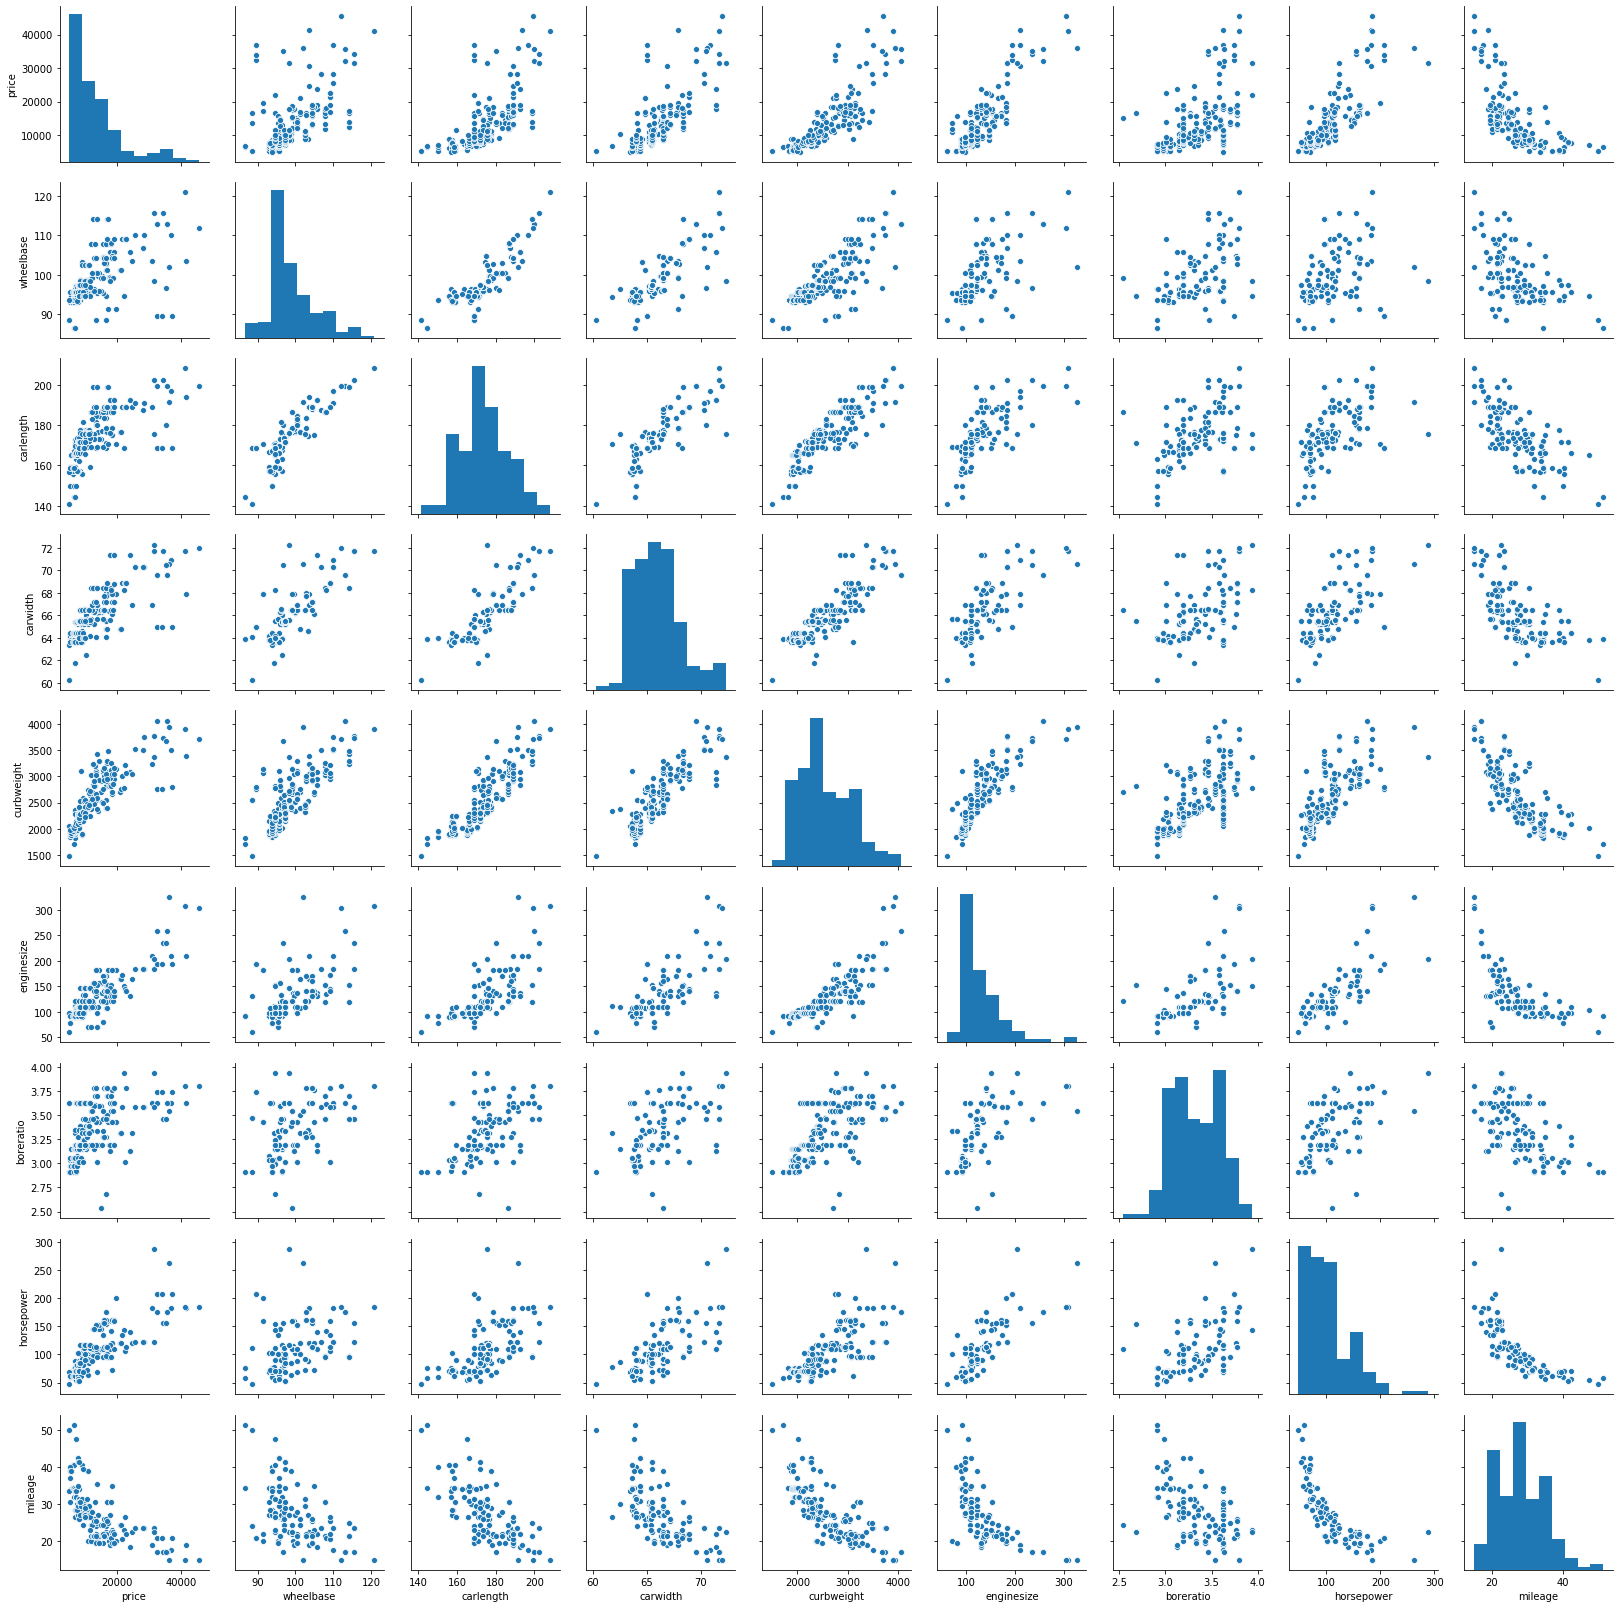

In [23]:
sns.pairplot(cars_df_ML)
plt.show()

In [24]:
# categorical to numerical 

print(cars_df_ML["cylindernumber"].value_counts())


catToNum = {"cylindernumber": {"four": 4, "six": 6, "five": 5, "eight": 8,"two": 2, "twelve": 12, "three":3 }}

cars_df_ML.replace(catToNum, inplace=True)
cars_df_ML.head()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,mileage,drivewheel,carbody,enginetype,fueltype,aspiration,cylindernumber,car_category
0,13495,88.60000,168.80000,64.10000,2548,130,3.47000,111,24.00000,rwd,convertible,dohc,gas,std,4,entryLuxury
1,16500,88.60000,168.80000,64.10000,2548,130,3.47000,111,24.00000,rwd,convertible,dohc,gas,std,4,entryLuxury
2,16500,94.50000,171.20000,65.50000,2823,152,2.68000,154,22.50000,rwd,hatchback,ohcv,gas,std,6,entryLuxury
3,13950,99.80000,176.60000,66.20000,2337,109,3.19000,102,27.00000,fwd,sedan,ohc,gas,std,4,entryLuxury
4,17450,99.40000,176.60000,66.40000,2824,136,3.19000,115,20.00000,4wd,sedan,ohc,gas,std,5,entryLuxury


In [25]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cars_df_ML['fueltype'] = le.fit_transform(cars_df_ML['fueltype'].astype(str)).astype(int)
cars_df_ML['aspiration'] = le.fit_transform(cars_df_ML['aspiration'].astype(str)).astype(int)


cars_df_ML

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,mileage,drivewheel,carbody,enginetype,fueltype,aspiration,cylindernumber,car_category
0,13495,88.60000,168.80000,64.10000,2548,130,3.47000,111,24.00000,rwd,convertible,dohc,1,0,4,entryLuxury
1,16500,88.60000,168.80000,64.10000,2548,130,3.47000,111,24.00000,rwd,convertible,dohc,1,0,4,entryLuxury
2,16500,94.50000,171.20000,65.50000,2823,152,2.68000,154,22.50000,rwd,hatchback,ohcv,1,0,6,entryLuxury
3,13950,99.80000,176.60000,66.20000,2337,109,3.19000,102,27.00000,fwd,sedan,ohc,1,0,4,entryLuxury
4,17450,99.40000,176.60000,66.40000,2824,136,3.19000,115,20.00000,4wd,sedan,ohc,1,0,5,entryLuxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,109.10000,188.80000,68.90000,2952,141,3.78000,114,25.50000,rwd,sedan,ohc,1,0,4,entryLuxury
201,19045,109.10000,188.80000,68.80000,3049,141,3.78000,160,22.00000,rwd,sedan,ohc,1,1,4,entryLuxury
202,21485,109.10000,188.80000,68.90000,3012,173,3.58000,134,20.50000,rwd,sedan,ohcv,1,0,6,entryLuxury
203,22470,109.10000,188.80000,68.90000,3217,145,3.01000,106,26.50000,rwd,sedan,ohc,0,1,6,entryLuxury


In [26]:
HotEncoded=pd.get_dummies(cars_df_ML[["drivewheel",'enginetype','car_category','carbody']],drop_first=True,prefix=["drivewheel",'enginetype','economic_segment','carbody'])
HotEncoded


,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,economic_segment_entryLuxury,economic_segment_HighEndLuxury,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,1,0,0,1,0,0
3,1,0,0,0,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,1,0,0,1,0,0,0,1,0,0,0,1,0
201,0,1,0,0,1,0,0,0,1,0,0,0,1,0
202,0,1,0,0,0,0,1,0,1,0,0,0,1,0
203,0,1,0,0,1,0,0,0,1,0,0,0,1,0


In [27]:
cars_df_ML=pd.concat([cars_df_ML,HotEncoded],axis=1)
cars_df_ML.drop(['drivewheel','enginetype','car_category','carbody'], axis=1,inplace=True)
cars_df_ML.head()


,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,mileage,fueltype,aspiration,cylindernumber,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,economic_segment_entryLuxury,economic_segment_HighEndLuxury,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,13495,88.60000,168.80000,64.10000,2548,130,3.47000,111,24.00000,1,0,4,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,16500,88.60000,168.80000,64.10000,2548,130,3.47000,111,24.00000,1,0,4,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,16500,94.50000,171.20000,65.50000,2823,152,2.68000,154,22.50000,1,0,6,0,1,0,0,0,0,1,0,1,0,0,1,0,0
3,13950,99.80000,176.60000,66.20000,2337,109,3.19000,102,27.00000,1,0,4,1,0,0,0,1,0,0,0,1,0,0,0,1,0
4,17450,99.40000,176.60000,66.40000,2824,136,3.19000,115,20.00000,1,0,5,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [28]:
from sklearn.model_selection import train_test_split
cars_df_ML_train,cars_df_ML_test=train_test_split(cars_df_ML,train_size=0.7,random_state=100)
print(cars_df_ML_train.shape)
print(cars_df_ML_test.shape)

(143, 26)
(62, 26)


In [29]:
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler()
exludeDumies=HotEncoded.columns
# cars_df_ML_train.loc[:, cars_df_ML_train.columns.difference(exludeDumies)]
cars_df_ML_train.loc[:, cars_df_ML_train.columns.difference(exludeDumies)]=scaler.fit_transform(cars_df_ML_train.loc[:, cars_df_ML_train.columns.difference(exludeDumies)])
cars_df_ML_train.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,mileage,fueltype,aspiration,cylindernumber,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,economic_segment_entryLuxury,economic_segment_HighEndLuxury,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
122,0.06882,0.24483,0.42602,0.29167,0.27269,0.13962,0.23016,0.08333,0.53425,1.00000,0.00000,0.20000,1,0,0,0,1,0,0,0,0,0,0,0,1,0
125,0.46689,0.27241,0.45203,0.66667,0.50039,0.33962,1.00000,0.39583,0.21918,1.00000,0.00000,0.20000,0,1,0,0,1,0,0,0,0,1,0,1,0,0
166,0.12211,0.27241,0.44878,0.30833,0.31497,0.13962,0.44444,0.26667,0.34247,1.00000,0.00000,0.20000,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.31445,0.06897,0.45041,0.31667,0.41117,0.26038,0.62698,0.26250,0.24658,1.00000,0.00000,0.20000,0,1,0,0,0,0,0,0,1,0,0,0,0,0
199,0.38213,0.61034,0.77561,0.57500,0.64740,0.26038,0.74603,0.47500,0.12329,1.00000,1.00000,0.20000,0,1,0,0,1,0,0,0,1,0,0,0,0,1


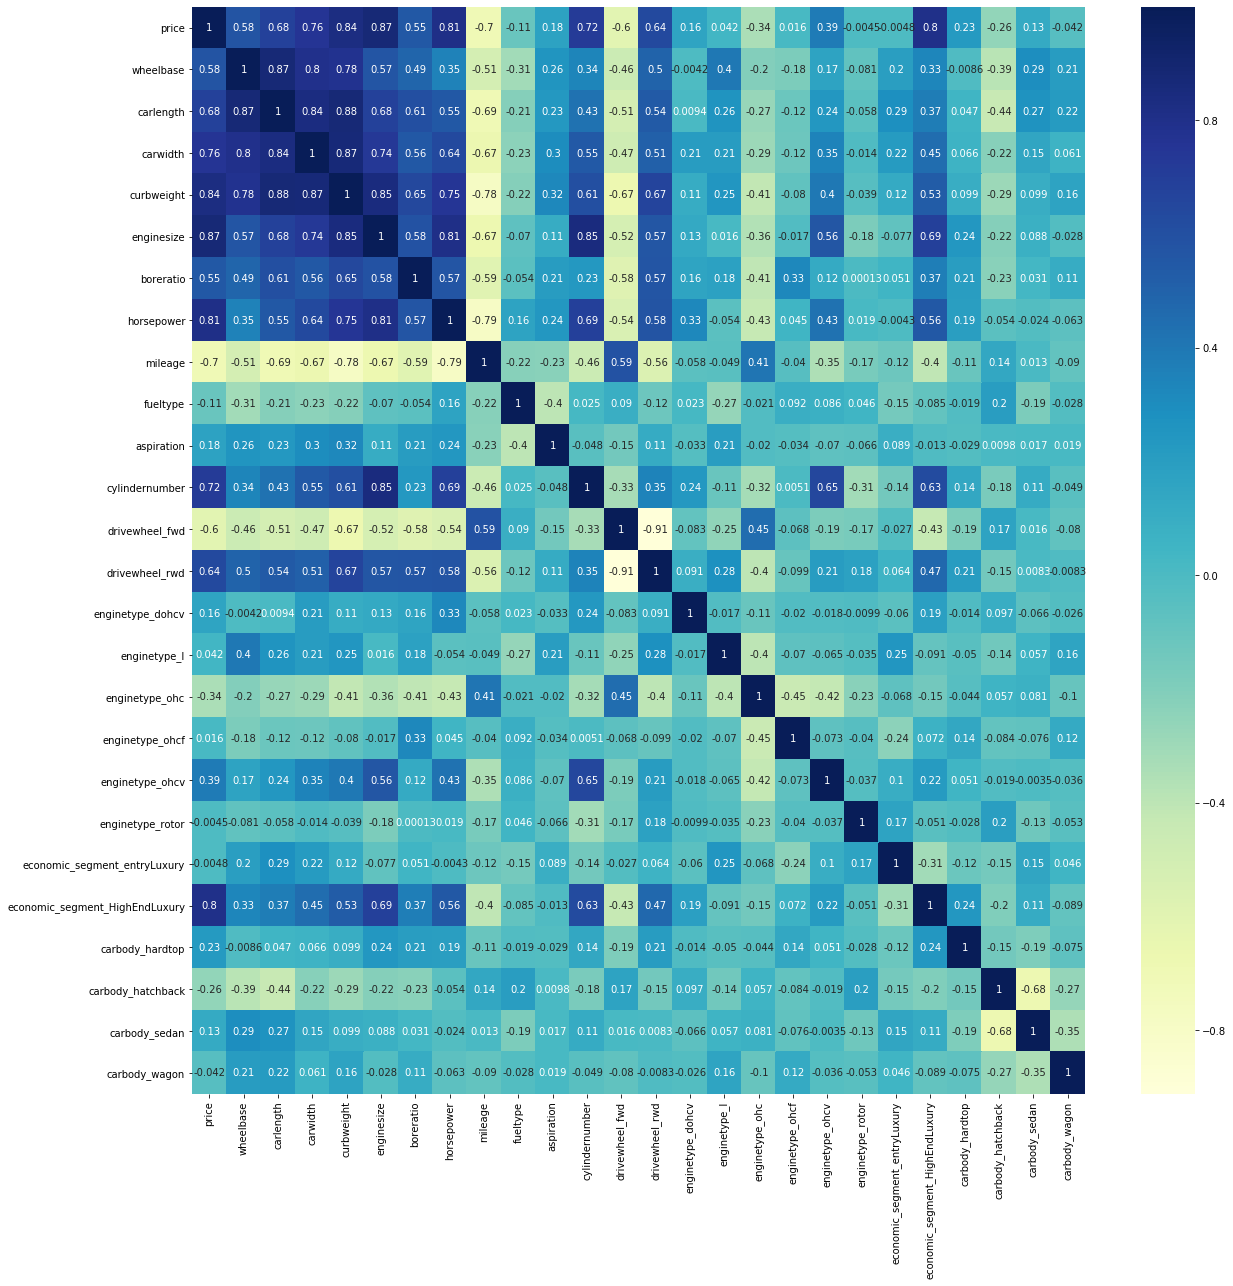

In [30]:
plt.figure(figsize=(20,20))
corHeatmap=sns.heatmap(cars_df_ML.corr(), annot = True, cmap="YlGnBu")
#below 2 lines are for temporary fix for matplotlib regression feature which broke heatmap  between 3.1.0 and 3.1.1
bottom, top = corHeatmap.get_ylim()
corHeatmap.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### According to above heatmap there are indeed certain variable like enginesize, horsepower,cylindernumber etc which have high correlation with price.Offcourse VIF betwen these varaible is something which needs to be checked

In [31]:
y_train=cars_df_ML_train.pop('price')
X_train=cars_df_ML_train

In [32]:
#Build a linear model with all varaibles just for testing 

import statsmodels.api as sm
def buildModel(X,y):
    global X_train_lm
    X_train_lm = sm.add_constant(X)
    global lr 
    lr = sm.OLS(y, X_train_lm).fit()
    print(lr.summary())
    
buildModel(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     77.79
Date:                Sun, 31 May 2020   Prob (F-statistic):           3.21e-61
Time:                        20:08:12   Log-Likelihood:                 222.09
No. Observations:                 143   AIC:                            -392.2
Df Residuals:                     117   BIC:                            -315.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

VIF(X_train)


                          Features       VIF
1                        carlength 137.19000
3                       curbweight 130.80000
4                       enginesize 121.00000
10                  cylindernumber  74.30000
2                         carwidth  68.89000
0                        wheelbase  52.05000
5                        boreratio  50.87000
6                       horsepower  49.48000
23                   carbody_sedan  36.34000
22               carbody_hatchback  23.38000
7                          mileage  23.02000
15                  enginetype_ohc  22.90000
8                         fueltype  22.75000
11                  drivewheel_fwd  17.72000
12                  drivewheel_rwd  13.36000
24                   carbody_wagon  11.58000
16                 enginetype_ohcf   7.00000
20  economic_segment_HighEndLuxury   3.80000
19    economic_segment_entryLuxury   3.56000
14                    enginetype_l   3.51000
9                       aspiration   3.49000
17        

### As we have multiple columns with high VIF instead of one by one dropping lets use automated RFE approach

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 2),
 ('carlength', False, 15),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 9),
 ('boreratio', False, 3),
 ('horsepower', True, 1),
 ('mileage', True, 1),
 ('fueltype', False, 14),
 ('aspiration', False, 13),
 ('cylindernumber', False, 4),
 ('drivewheel_fwd', False, 10),
 ('drivewheel_rwd', False, 11),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 12),
 ('enginetype_ohc', False, 7),
 ('enginetype_ohcf', False, 6),
 ('enginetype_ohcv', False, 16),
 ('enginetype_rotor', True, 1),
 ('economic_segment_entryLuxury', False, 8),
 ('economic_segment_HighEndLuxury', True, 1),
 ('carbody_hardtop', False, 5),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1)]

In [35]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'horsepower', 'mileage', 'enginetype_dohcv',
       'enginetype_rotor', 'economic_segment_HighEndLuxury',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index(['wheelbase', 'carlength', 'enginesize', 'boreratio', 'fueltype',
       'aspiration', 'cylindernumber', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'economic_segment_entryLuxury', 'carbody_hardtop'],
      dtype='object')

In [37]:
X_train_rfe = X_train[col]

buildModel(X_train_rfe,y_train)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     175.8
Date:                Sun, 31 May 2020   Prob (F-statistic):           3.58e-71
Time:                        20:08:12   Log-Likelihood:                 207.24
No. Observations:                 143   AIC:                            -392.5
Df Residuals:                     132   BIC:                            -359.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [38]:
#high pvalue
X_train_rfe.drop('curbweight',axis=1,inplace=True)
buildModel(X_train_rfe,y_train)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     170.6
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.57e-68
Time:                        20:08:12   Log-Likelihood:                 197.79
No. Observations:                 143   AIC:                            -375.6
Df Residuals:                     133   BIC:                            -345.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [39]:
#high pvalue
X_train_rfe.drop('mileage',axis=1,inplace=True)
buildModel(X_train_rfe,y_train)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     190.5
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.69e-69
Time:                        20:08:12   Log-Likelihood:                 196.82
No. Observations:                 143   AIC:                            -375.6
Df Residuals:                     134   BIC:                            -349.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [40]:
#high pvalue
X_train_rfe.drop('enginetype_rotor',axis=1,inplace=True)
buildModel(X_train_rfe,y_train)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Sun, 31 May 2020   Prob (F-statistic):           4.70e-70
Time:                        20:08:12   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [41]:
#high VIF trying few things with different columns one by one
buildModel(X_train_rfe.drop('carwidth',axis=1),y_train)
VIF(X_train_rfe.drop('carwidth',axis=1))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     136.9
Date:                Sun, 31 May 2020   Prob (F-statistic):           4.18e-55
Time:                        20:08:12   Log-Likelihood:                 156.48
No. Observations:                 143   AIC:                            -299.0
Df Residuals:                     136   BIC:                            -278.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [42]:
# removing car width is drastically reducing r2 hence lets try omitting horsepower
buildModel(X_train_rfe.drop('horsepower',axis=1),y_train)
VIF(X_train_rfe.drop('horsepower',axis=1))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     146.8
Date:                Sun, 31 May 2020   Prob (F-statistic):           6.97e-57
Time:                        20:08:12   Log-Likelihood:                 160.80
No. Observations:                 143   AIC:                            -307.6
Df Residuals:                     136   BIC:                            -286.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [43]:
# even reducing horsepower is drastically reucing r2 hence lets try omitting carbody_sedan
buildModel(X_train_rfe.drop('carbody_sedan',axis=1),y_train)
VIF(X_train_rfe.drop('carbody_sedan',axis=1))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.68e-69
Time:                        20:08:13   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [44]:
#ok omitting carbody_sedan keeps r2 value and r adjusted almost same 
#so lets now drop carbody_wagon from here as it has high p value
buildModel(X_train_rfe.drop(['carbody_wagon','carbody_sedan'],axis=1),y_train)
VIF(X_train_rfe.drop(['carbody_wagon','carbody_sedan'],axis=1))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.57e-70
Time:                        20:08:13   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [45]:
# still car width has high VIF hence finally removing it
#remvoing horsepower here has almost 1% more drop in r2 and adjusted r2 then compared to carwidth hence i have choosen car width
X_train_rfe.drop(['carbody_wagon','carbody_sedan','carwidth'],axis=1,inplace=True)
buildModel(X_train_rfe,y_train)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     207.5
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.56e-57
Time:                        20:08:13   Log-Likelihood:                 156.22
No. Observations:                 143   AIC:                            -302.4
Df Residuals:                     138   BIC:                            -287.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [46]:
y_train_price = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

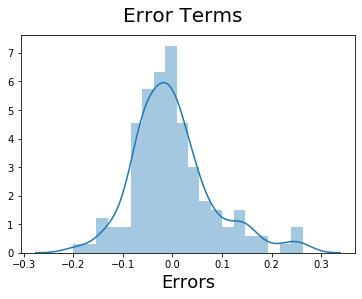

In [47]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [48]:
# Error terms seem to be approximately normally distributed
# applying scaler to test data
cars_df_ML_test.loc[:, cars_df_ML_test.columns.difference(exludeDumies)]=scaler.transform(cars_df_ML_test.loc[:, cars_df_ML_test.columns.difference(exludeDumies)])


In [49]:
y_test = cars_df_ML_test.pop('price')
X_test = cars_df_ML_test

In [50]:

X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [51]:
# Making predictions
y_pred = lr.predict(X_test_new)

Text(0, 0.5, 'y_pred')

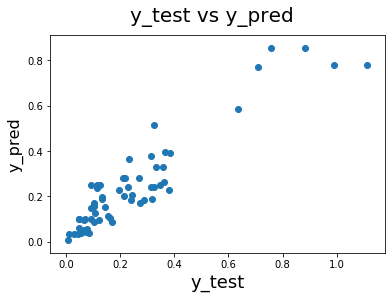

In [52]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [53]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8608612212755918


We can see that the equation of our best fitted line is:

$ price = 0.7692  \times  horsepoer - 0.3247  \times  enginetypeDohcv + 0.3122 \times economicDegmentHighEndLuxury - 0.0612 \times carbodyHatchback + 0.0306 $
